In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

> custmoerID -> Categorical Nominal 

> gender -> Categorical Nominal 

> SeniorCitizen -> Categorical Ordinal 

> Partner -> Categorical Nominal

> Dependents -> Categorical Nominal

> tenure -> Numerical discrete 

> PhoneService -> Categorical Nominal

> MultipleLines -> Categorical Nominal

> InternetService -> Categorical Nominal

> OnlineSecurity -> Categorical Nominal

> OnlineBackup -> Categorical Nominal

> DeviceProtection -> Categorical Nominal

> PaymentMethod -> Categorical Nominal

> MonthlyCharges -> Numerical Continous (Ratio)

> TechSupport -> Categorical Nominal

> StreamingTV -> Categorical Nominal

> StreamingMovies -> Categorical Nominal

> Contract -> Categorical Nominal

> PaperlessBilling -> Categorical Nominal

> TotalCharges -> Numerical Ratio 

> Churn -> Categorical Nominal

In [155]:
# For Ratio Or Interval
(df[df.totalcharges < 0])['totalcharges'].count()

0

In [7]:
df.shape

(7043, 21)

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [15]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [18]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [20]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [21]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [22]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [24]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [25]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [26]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [27]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [29]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [30]:
df['TotalCharges'].unique() 

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [31]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df.duplicated().sum()

0

 # Cleaning Data 
 

In [33]:
df['MultipleLines'].replace('No phone service','No',inplace=True)

In [34]:
df['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [35]:
df['MultipleLines'].replace('No phone service','No',inplace=True)

In [36]:
df['OnlineSecurity'].replace('No internet service','No',inplace=True)

In [37]:
df['DeviceProtection'].replace('No internet service','No',inplace=True)

In [38]:
df['TechSupport'].replace('No internet service','No',inplace=True)

In [39]:
df['StreamingTV'].replace('No internet service','No',inplace=True)

In [40]:
df['StreamingMovies'].replace('No internet service','No',inplace=True)

In [41]:
df['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
df[df['TotalCharges']==' '].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [43]:
df.drop([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],axis=0,inplace=True)

In [44]:
df[df['TotalCharges']==' '].index

Int64Index([], dtype='int64')

In [45]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [46]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [47]:
df.rename(columns=lambda x : x.strip().lower(),inplace=True)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis:

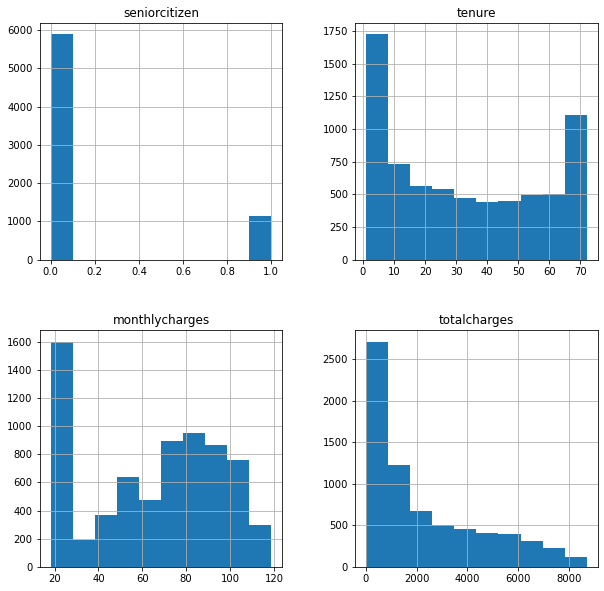

In [48]:
df.hist(figsize=(10,10));

In [49]:
df.query('gender == "Male"').onlinesecurity.value_counts()

No     2558
Yes     991
Name: onlinesecurity, dtype: int64

In [50]:
df.query('gender == "Female"').onlinesecurity.value_counts()

No     2459
Yes    1024
Name: onlinesecurity, dtype: int64

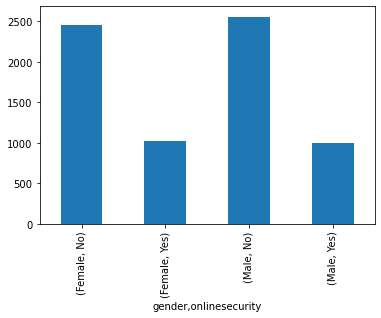

In [51]:
df.groupby('gender').onlinesecurity.value_counts().plot(kind = "bar");

In [52]:
df.query('gender == "Male"').deviceprotection.value_counts()

No     2330
Yes    1219
Name: deviceprotection, dtype: int64

In [53]:
df.query('gender == "Female"').deviceprotection.value_counts()

No     2284
Yes    1199
Name: deviceprotection, dtype: int64

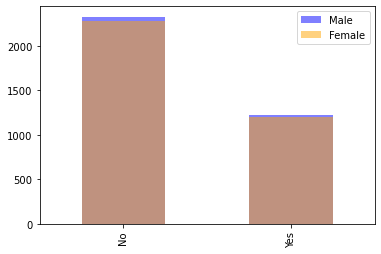

In [54]:
df.query('gender == "Male"').deviceprotection.value_counts().plot(kind='bar', alpha=0.5, color='blue',label='Male')
df.query('gender == "Female"').deviceprotection.value_counts().plot(kind='bar', alpha=0.5, color='orange',label='Female')
plt.legend();

In [55]:
df.query('gender == "Male"').contract.value_counts()

Month-to-month    1950
Two year           845
One year           754
Name: contract, dtype: int64

In [56]:
df.query('gender == "Female"').contract.value_counts()

Month-to-month    1925
Two year           840
One year           718
Name: contract, dtype: int64

In [57]:
df.query('gender == "Female"').techsupport.value_counts()

No     2459
Yes    1024
Name: techsupport, dtype: int64

In [58]:
df.query('gender == "Male"').techsupport.value_counts()

No     2533
Yes    1016
Name: techsupport, dtype: int64

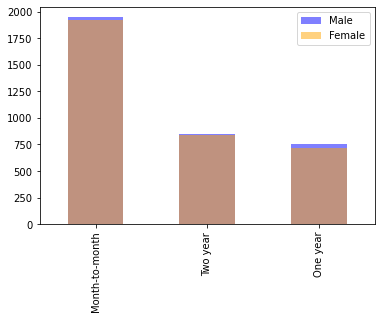

In [59]:
df.query('gender == "Male"').contract.value_counts().plot(kind='bar', alpha=0.5, color='blue',label='Male')
df.query('gender == "Female"').contract.value_counts().plot(kind='bar', alpha=0.5, color='orange',label='Female')
plt.legend();

In [60]:
df.query('gender == "Male"').paymentmethod.value_counts()

Electronic check             1195
Mailed check                  829
Credit card (automatic)       770
Bank transfer (automatic)     755
Name: paymentmethod, dtype: int64

In [61]:
df.query('gender == "Female"').paymentmethod.value_counts()

Electronic check             1170
Bank transfer (automatic)     787
Mailed check                  775
Credit card (automatic)       751
Name: paymentmethod, dtype: int64

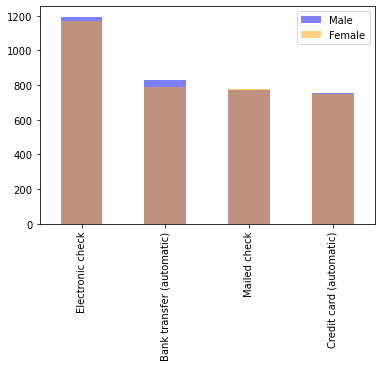

In [62]:
df.query('gender == "Male"').paymentmethod.value_counts().plot(kind='bar', alpha=0.5, color='blue',label='Male')
df.query('gender == "Female"').paymentmethod.value_counts().plot(kind='bar', alpha=0.5, color='orange',label='Female')
plt.legend();

In [63]:
df.query('gender == "Female"').streamingmovies.value_counts()

No     2113
Yes    1370
Name: streamingmovies, dtype: int64

In [64]:
df.query('gender == "Male"').streamingmovies.value_counts()

No     2188
Yes    1361
Name: streamingmovies, dtype: int64

In [65]:
df.groupby('paymentmethod').contract.value_counts()

paymentmethod              contract      
Bank transfer (automatic)  Month-to-month     589
                           Two year           562
                           One year           391
Credit card (automatic)    Two year           580
                           Month-to-month     543
                           One year           398
Electronic check           Month-to-month    1850
                           One year           347
                           Two year           168
Mailed check               Month-to-month     893
                           Two year           375
                           One year           336
Name: contract, dtype: int64

In [66]:
df.contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: contract, dtype: int64

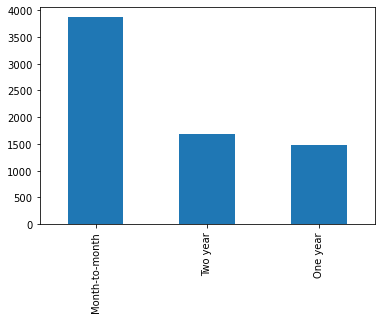

In [67]:
df.contract.value_counts().plot(kind = "bar");

In [68]:
df.paymentmethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: paymentmethod, dtype: int64

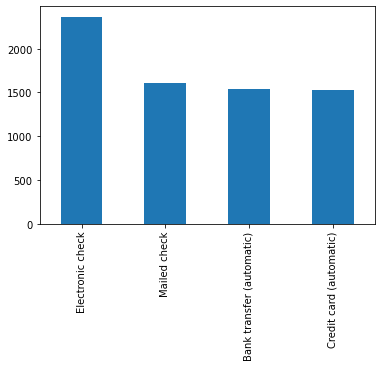

In [69]:
df.paymentmethod.value_counts().plot(kind = "bar");

In [70]:
df.groupby('contract').totalcharges.mean()

contract
Month-to-month    1369.254581
One year          3034.683084
Two year          3728.933947
Name: totalcharges, dtype: float64

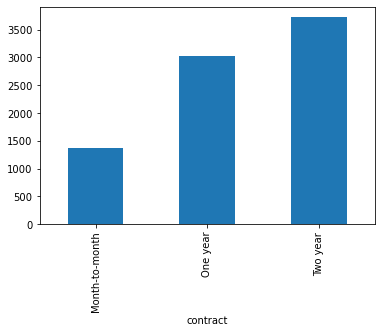

In [71]:
df.groupby('contract').totalcharges.mean().plot(kind = "bar");

In [72]:
df.query('contract == "One year"').churn.value_counts()

No     1306
Yes     166
Name: churn, dtype: int64

In [73]:
df.query('contract == "Two year"').churn.value_counts()

No     1637
Yes      48
Name: churn, dtype: int64

In [74]:
df.query('contract == "Month-to-month"').churn.value_counts()

No     2220
Yes    1655
Name: churn, dtype: int64

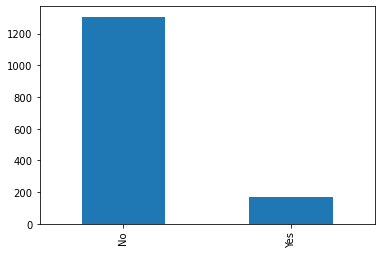

In [75]:
df.query('contract == "One year"').churn.value_counts().plot(kind = "bar");

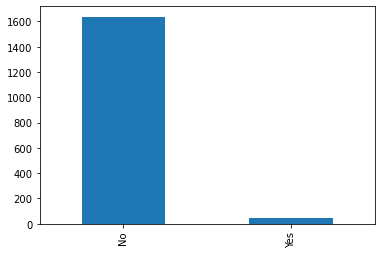

In [76]:
df.query('contract == "Two year"').churn.value_counts().plot(kind = "bar");

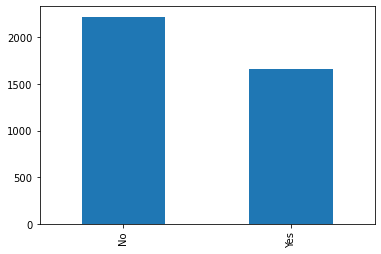

In [77]:
df.query('contract == "Month-to-month"').churn.value_counts().plot(kind = "bar");

> # 1.The proportion of Male and Female in The population 

In [78]:
df_male = df.query("gender == 'Male'")
df_female = df.query("gender == 'Female'")

In [79]:
df_female.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [80]:
print("The proportion of Male in the population is : ",round(df_male['gender'].count() / df['gender'].count(),3))
print("The proportion of Female in the population is : ",round(df_female['gender'].count() / df['gender'].count(),3))

The proportion of Male in the population is :  0.505
The proportion of Female in the population is :  0.495


In [81]:
# can be calculated with mean()
round((df['gender'] == 'Male').mean(),3)

0.505

 # 2.The Propertion of Churn in The population 

In [83]:
print("The proportion of Churn in the population is : ",round((df['churn']=='Yes').mean(),3))

The proportion of Churn in the population is :  0.266


In [84]:
print("The proportion of Non Churn in the population is : ",round((df['churn']=='No').mean(),3))

The proportion of Non Churn in the population is :  0.734


# 3.The Proportion of Male That is Churn From All Churns

In [85]:
print("The proportion of Male That is Churn from All Churns : ",round(df_male[df_male['churn']=='Yes'].count()[0] / df[df['churn'] == 'Yes'].count()[0],3))

The proportion of Male That is Churn from All Churns :  0.498


In [86]:
df_male[df_male['churn']=='Yes'].count()[0]

930

In [87]:
df[df['churn'] == 'Yes'].count()[0]

1869

# 4.The Proportion of Female That is Churn From All Churns

In [88]:
print("The proportion of Male That is Churn from All Churns : ",round(df_female[df_female['churn']=='Yes'].count()[0] / df[df['churn'] == 'Yes'].count()[0],3))

The proportion of Male That is Churn from All Churns :  0.502


># 5.The Proportion of Partner That is Churn From All Churns

In [89]:
df_partner = df.query("partner == 'Yes'")
print("The proportion of Male That is Churn from All Churns : ",round(df_partner[df_partner['churn']=='Yes'].count()[0] / df[df['churn'] == 'Yes'].count()[0],3))

The proportion of Male That is Churn from All Churns :  0.358


# 6.The Proportion of each internet service that is Churn From All Churn

In [90]:
df_dsl = df.query("partner == 'DSL'")
df_fiber_optic = df.query("internetservice == 'Fiber optic'")

In [91]:
print("The proportion of DSL Internet Service That is Churn from All Churns : ",round(df_dsl[df_dsl['churn']=='Yes'].count()[0] / df[df['churn'] == 'Yes'].count()[0],3))
print("The proportion of Fiber Optic Internet Service That is Churn from All Churns : ",round(df_fiber_optic[df_fiber_optic['churn']=='Yes'].count()[0] / df[df['churn'] == 'Yes'].count()[0],3))

The proportion of DSL Internet Service That is Churn from All Churns :  0.0
The proportion of Fiber Optic Internet Service That is Churn from All Churns :  0.694


In [92]:
df_dsl[df_dsl['churn']=='Yes'].count()[0]

0

# 7.Proportion of Phone Service That is Churn from all churns

In [93]:
df_phoneservice = df.query("phoneservice == 'Yes'")
print("The proportion of Phone Service That is Churn from All Churns : ",round(df_phoneservice[df_phoneservice['churn']=='Yes'].count()[0] / df[df['churn'] == 'Yes'].count()[0],3))

The proportion of Phone Service That is Churn from All Churns :  0.909


> # Proportion of Contracts 

In [112]:
# Proportion of one - Year Contract 
print("Proportion of one - Year Contract : ",df.query("contract == 'One year' ").count()[0] / df.shape[0])

Proportion of one - Year Contract :  0.20932878270762229


In [113]:
# Proportion of Two - year Contract 
print("Proportion of one - Year Contract : ",df.query("contract == 'Two year' ").count()[0] / df.shape[0])

Proportion of one - Year Contract :  0.2396188850967008


In [114]:
# Proportion of Month-to-month Contracts 
print("Proportion of one - Year Contract : ",df.query("contract == 'Month-to-month'").count()[0] / df.shape[0])

Proportion of one - Year Contract :  0.551052332195677


> # 8.Proportion of Contracts that is churns from all churns 

In [136]:
# Number of One - Year Contract That is Churn  
df.groupby("contract").churn.value_counts()['One year']['Yes']

166

In [137]:
# Number of Two - Year Contract That is Churn  
df.groupby("contract").churn.value_counts()['Two year']['Yes']

48

In [138]:
# Number of Month-to-month Contract That is Churn  
df.groupby("contract").churn.value_counts()['Month-to-month']['Yes']

1655

In [139]:
#Proportion of one - Year Contract That is Churn from all Churns
print("The proportion of One - Year  That is Churn from All Churns : ",round(df.groupby("contract").churn.value_counts()['One year']['Yes'] / df[df['churn'] == 'Yes'].count()[0],3))

The proportion of Phone Service That is Churn from All Churns :  0.089


In [141]:
#Proportion of Two - Year Contract That is Churn from all Churns
print("The Proportion of Two - Year Contract That is Churn from All Churns : ",round(df.groupby("contract").churn.value_counts()['Two year']['Yes'] / df[df['churn'] == 'Yes'].count()[0],3))

The Proportion of Two - Year Contract That is Churn from All Churns :  0.026


In [142]:
#Proportion of Month-to-month Contract That is Churn from all Churns
print("The Proportion of Month-to-month Contract That is Churn from All Churns : ",round(df.groupby("contract").churn.value_counts()['Month-to-month']['Yes'] / df[df['churn'] == 'Yes'].count()[0],3))

The Proportion of Month-to-month Contract That is Churn from All Churns :  0.886


> # 9.Contracts That is most profitable

In [117]:
df.groupby("contract").totalcharges.mean()

contract
Month-to-month    1369.254581
One year          3034.683084
Two year          3728.933947
Name: totalcharges, dtype: float64

In [126]:
# Average of one - Year Contract with total Charges 
print("Average of one - Year Contract with total Charges : ",df.groupby("contract").totalcharges.mean()['One year'])

Average of one - Year Contract with total Charges :  3034.683084239132


In [127]:
# Average of one - Year Contract with total Charges 
print("Average of Two - year Contract with total Charges : ",df.groupby("contract").totalcharges.mean()['Two year'])

Average of Two - year Contract with total Charges :  3728.9339465875396


In [128]:
# Average of one - Year Contract with total Charges 
print("Average of Two - year Contract with total Charges : ",df.groupby("contract").totalcharges.mean()['Month-to-month'])

Average of Two - year Contract with total Charges :  1369.254580645158


 # The Mean of Male Total Charges and Monthly Charges 

In [94]:
mean_male_total_charges = df_male.totalcharges.mean()
mean_male_total_charges

2283.407861369399

In [95]:
mean_male_monthly_charges = df_male.monthlycharges.mean()
mean_male_monthly_charges

64.38754578754553

# The Mean of Female Total Charges and Monthly Charges 

In [97]:
mean_female_total_charges = df_female.totalcharges.mean()
mean_female_total_charges

2283.1909847832326

In [98]:
mean_female_monthly_charges = df_female.monthlycharges.mean()
mean_female_monthly_charges

65.21665231122593

In [99]:
df_female.totalcharges.sum()

7952354.2

In [100]:
df_male.totalcharges.sum()

8103814.5

In [101]:
diff_mean = []
for _ in range(10000):
    boot_strap = df.sample(1000,replace=True)
    sample_male = boot_strap.query("gender == 'Male'")
    sample_female = boot_strap.query("gender == 'Female'")
    male_total = sample_male.totalcharges.mean()
    female_total = sample_female.totalcharges.mean()
    diff_mean.append(male_total - female_total) 

In [102]:
diff_mean = np.array(diff_mean)

In [103]:
diff_mean.mean()

0.11180271951678523

> # 95% Confidence Interval of difference in Total Charges (Male and Female) 

In [104]:
(np.percentile(diff_mean,2.5),np.percentile(diff_mean,97.5))

(-277.3409694979958, 279.92041715434004)

In [105]:
obs_diff = mean_male_total_charges - mean_female_total_charges
obs_diff

0.21687658616656336

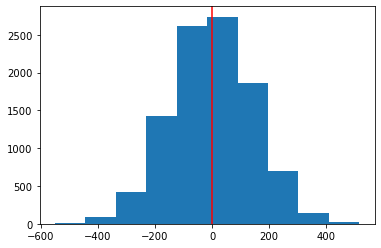

In [106]:
plt.hist(diff_mean)
plt.axvline(obs_diff,c='r')

# Conclusions

>Most Efficient contract type is Month to month contracts and its double one year contracts , two year contracts.

>Most of the customers preferred Electronic check payment method.

>Although Month to month was the most preferred contracts, customers for this type of contracts seem unloyal to the company With 89% Churns From All Churns (Very High), on the other hand, Two year customers are the most loyal customers.

> People With DSL Internet Service is Most Loyality to Company as it no churns 

>Two year contracts are the most profitable contracts for the company

> People with phone service have very Low Loyality to Company as it's 90.9% from all churns

> The difference in total charges is between -277 and 279 with 95% confidence Interval